<img src="logo.png" width="200"/>


### 신세계 주가 분석

* 현상황
    - 코로나로 인한 급격한 사회 변화로 기존의 오프라인 유통망 중심의 기업에 큰 타격이 있음
*  투자 전략
    - 웹 크롤링을 통한 빅데이터 분석을 활용 경쟁사 분석및 투자 모멘텀 확보
    - 급격한 하락장에서 손실을 만회하기위한 주식 모멘텀 투자전략을 확보
    - 불확실성이 증대된 시장에서의 생존 전략은 단타 모멘텀 전략필요
    - 발빠른 손실 보전을 통해 이익보다는 손실 방어에 주력
    - 기존에 투자전략인 5-20 투자 전략의 경우 30% 정도 하락한 시장에서 20% 대 하락에 머물렀으나
    - 3-5 투자 전략을 사용한 결과 5% 미만의 손실 낙폭을 줄일수 있었음
* 주가 개선안
    - 온라인 기반의 유통사들이 빠르게 오프라인 유통사의 경쟁자로 부각
    - 빠르고 다각화된 온라인 유통시장 전개로 시대 변화에 적응 필요
    

In [ ]:
# 신세계 그룹분석
* 신세계 그룹 개요
    - 설립일: 1930년 10월 24일
    - 주소: 서울특별시 중구 소공로 63 (충무로1가)
    - 창업주: 이병철
    - 회장:이명희
    - 시가총액:7조 8,722억원:
    - 매출액:6조 3,936억 5,371만원 (2019)
    - 영업이익:4,681억 5,464만원 (2019) #
    - 순이익:5,981억 6,917만원 (2019) #

### 기업분석 2
    * 상장사
        - (주)신세계 
        - (주)이마트 
        - (주)광주신세계 
        - 신세계건설(주) 
        - (주)신세계아이앤씨 035510
        - (주)신세계푸드 031440
        - (주)신세계인터내셔날 

In [59]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font='malgun.ttf'
f_name=fm.FontProperties(fname=font).get_name()
mpl.rc('font',family=f_name)

In [60]:
dbname="naverstock.db"
def seldb(scode='004170',frday=0):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        #sqlins="insert into ..."
        sqlsel="select SDAY,SOPEN,SHIGH,SLOW,SCLOSE,SVOL from stockdata where scode='{0}' and sday>{1} order by SDAY asc".format(scode,frday)
        sdata=cur.execute(sqlsel).fetchall()
    return sdata


In [61]:
nstock=seldb('004170',frday=20200101)
len(nstock)

189

### 데이터 프레임화
* 데이터 프레임을 통해 데이터 분석을 용이 하게 함
* 최근 코로나에 의한 변동성 추이를 보기위해 최근 1년간 데이터 확인

In [62]:
col=['SDAY','SOPEN','SHIGH','SLOW','SCLOSE','SVOL']
sf=pd.DataFrame(data=nstock,columns=col)
sf.head()


,SDAY,SOPEN,SHIGH,SLOW,SCLOSE,SVOL
0,20200102,289500,296500,289500,292500,48510
1,20200103,296500,297000,290500,292500,40984
2,20200106,288000,294000,288000,290000,24759
3,20200107,293000,311500,291500,305000,99705
4,20200108,305000,312000,299000,306500,73747


### 기초통계분석
* 기업의 주가 변동 상황의 기초적 통계를 통해 변동성을 추정 
* 중위수가 평균보다 낮은 상황을 볼수 있다.

In [63]:
sf.describe()

,SDAY,SOPEN,SHIGH,SLOW,SCLOSE,SVOL
count,1.890000e+02,189.000000,189.000000,189.000000,189.000000,189.000000
mean,2.020053e+07,239095.238095,243907.407407,234478.835979,238746.031746,98322.079365
std,2.613631e+02,31997.779653,33074.354469,31271.368468,32142.577112,47511.682461
min,2.020010e+07,203000.000000,204000.000000,199000.000000,200500.000000,24759.000000
25%,2.020031e+07,211500.000000,216500.000000,208000.000000,211500.000000,64872.000000
50%,2.020052e+07,232500.000000,238000.000000,225000.000000,231000.000000,90286.000000
75%,2.020073e+07,255500.000000,261500.000000,249500.000000,254500.000000,121881.000000
max,2.020101e+07,328000.000000,333500.000000,319500.000000,324000.000000,310579.000000


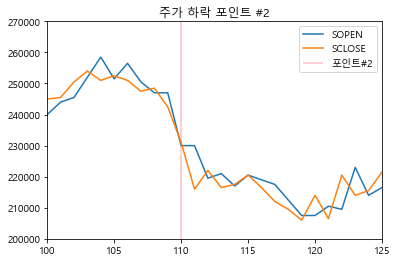

In [64]:
sf[['SOPEN','SCLOSE']].plot()
plt.xlim(100,125)
plt.ylim(200000,270000)
plt.title("주가 하락 포인트 #2")
plt.vlines(110,200000,2700000,color="pink", label="포인트#2")
plt.legend()
plt.show()

In [65]:
days=[str(d)[0:4]+"-"+str(d)[4:6]+"-"+str(d)[6:8] for d in sf['SDAY']]


In [66]:
col=['SCLOSE']
movdf=sf[col]
movdf.index=days
movdf.head()

,SCLOSE
2020-01-02,292500
2020-01-03,292500
2020-01-06,290000
2020-01-07,305000
2020-01-08,306500


In [67]:
# 이평선 함수
def makeMov(srcList=[],mday=5):
    movline=[0 for i in range(mday-1)]
    rLen=len(srcList)-(mday-1)
    for i in range(rLen):
        m=np.mean(srcList[i:mday+i])
        movline.append(m)
    return movline

In [68]:
# 이동평균 데이터 만들기
longday=5
movdf['mov5']=makeMov(movdf['SCLOSE'],3)
movdf['mov20']=makeMov(movdf['SCLOSE'],longday)
movdf.head(30)

<ipython-input-68-0b96be16c715>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movdf['mov5']=makeMov(movdf['SCLOSE'],3)
<ipython-input-68-0b96be16c715>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movdf['mov20']=makeMov(movdf['SCLOSE'],longday)


,SCLOSE,mov5,mov20
2020-01-02,292500,0.000000,0.0
2020-01-03,292500,0.000000,0.0
2020-01-06,290000,291666.666667,0.0
2020-01-07,305000,295833.333333,0.0
2020-01-08,306500,300500.000000,297300.0
2020-01-09,314500,308666.666667,301700.0
2020-01-10,312500,311166.666667,305700.0
2020-01-13,324000,317000.000000,312500.0
2020-01-14,321500,319333.333333,315800.0
2020-01-15,323500,323000.000000,319200.0


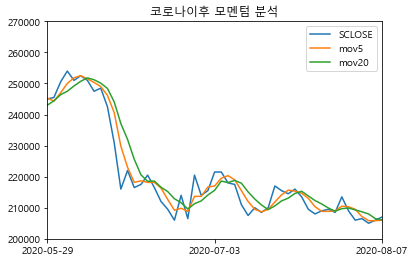

In [69]:
movdf.plot()
plt.title("코로나이후 모멘텀 분석")
plt.xlim(100,150)
plt.ylim(200000,270000)
plt.show()

In [70]:
movdf.tail()

,SCLOSE,mov5,mov20
2020-09-25,204000,204666.666667,206800.0
2020-09-28,208500,205000.000000,206200.0
2020-09-29,212500,208333.333333,207000.0
2020-10-05,213000,211333.333333,208100.0
2020-10-06,210000,211833.333333,209600.0


In [71]:
movdf['diff']=(movdf['mov5']-movdf['mov20'])/np.abs(movdf['mov5']-movdf['mov20'])
movdf.tail()

<ipython-input-71-32f54fe042fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movdf['diff']=(movdf['mov5']-movdf['mov20'])/np.abs(movdf['mov5']-movdf['mov20'])


,SCLOSE,mov5,mov20,diff
2020-09-25,204000,204666.666667,206800.0,-1.0
2020-09-28,208500,205000.000000,206200.0,-1.0
2020-09-29,212500,208333.333333,207000.0,1.0
2020-10-05,213000,211333.333333,208100.0,1.0
2020-10-06,210000,211833.333333,209600.0,1.0


In [72]:

havestock=[0 for i in range(longday)]
timing=[0 for i in range(longday)]
#havestock
size=len(movdf['diff'])
prepos=movdf['diff'][longday]#+라면 보유필요 -라면 대기

# 시작시 단기물이 장기물보다 위에 있으면 구매
if prepos > 0:
    havestock.append(1)
    timing.append(1)

else:
    havestock.append(0)
    timing.append(0)
print(len(havestock))
prehave=havestock[longday]
# 시작 다음날부터는 전일과 비교후 모멘텀 투자
for i in range(longday+1,size):
    nowpos=movdf['diff'][i]
    
    if(prepos==nowpos):
        havestock.append(prehave)
        timing.append(0)
    elif(prepos>nowpos):# 매도
        # 앞에 보유 했니?
        if(prehave):
            havestock.append(0)
            timing.append(-1)
        else:
            havestock.append(0)
            timing.append(0)
    else:# 매수 보유했으면 추가 매수 없음
        if(prehave):
            havestock.append(0)
            timing.append(0)
        else:# 보유없으므로 추가 매수
            havestock.append(1)
            timing.append(1)
    prepos=nowpos
    prehave=havestock[i]
print(len(timing))
movdf['havestock']=havestock
movdf['timing']=timing


6
189


<ipython-input-72-24433c054833>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movdf['havestock']=havestock


In [73]:
movdf['price']=movdf['timing']*movdf['SCLOSE']
movdf['profit']=movdf['price'].cumsum()

In [74]:
movdf.head(30)

,SCLOSE,mov5,mov20,diff,havestock,timing,price,profit
2020-01-02,292500,0.000000,0.0,NaN,0,0,0,0
2020-01-03,292500,0.000000,0.0,NaN,0,0,0,0
2020-01-06,290000,291666.666667,0.0,1.0,0,0,0,0
2020-01-07,305000,295833.333333,0.0,1.0,0,0,0,0
2020-01-08,306500,300500.000000,297300.0,1.0,0,0,0,0
2020-01-09,314500,308666.666667,301700.0,1.0,1,1,314500,314500
2020-01-10,312500,311166.666667,305700.0,1.0,1,0,0,314500
2020-01-13,324000,317000.000000,312500.0,1.0,1,0,0,314500
2020-01-14,321500,319333.333333,315800.0,1.0,1,0,0,314500
2020-01-15,323500,323000.000000,319200.0,1.0,1,0,0,314500


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


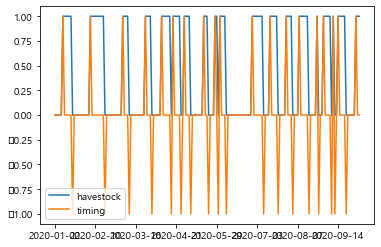

In [75]:
movdf[['havestock','timing']].plot()

In [76]:
movdf.tail(30)

,SCLOSE,mov5,mov20,diff,havestock,timing,price,profit
2020-08-21,206000,207500.000000,212500.0,-1.0,0,0,0,1000
2020-08-24,205500,205500.000000,207600.0,-1.0,0,0,0,1000
2020-08-25,207000,206166.666667,207000.0,-1.0,0,0,0,1000
2020-08-26,204500,205666.666667,205600.0,1.0,1,1,204500,205500
2020-08-27,200500,204000.000000,204700.0,-1.0,0,-1,-200500,5000
2020-08-28,205500,203500.000000,204600.0,-1.0,0,0,0,5000
2020-08-31,203000,203000.000000,204100.0,-1.0,0,0,0,5000
2020-09-01,204000,204166.666667,203500.0,1.0,1,1,204000,209000
2020-09-02,213500,206833.333333,205300.0,1.0,1,0,0,209000
2020-09-03,213500,210333.333333,207900.0,1.0,1,0,0,209000
